In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [138]:
class Statistic:
    def __init__(self, panda):
        self.data = panda[panda['role'] == 'student']
        
    def media_acao(self, x):
        g = self.data[self.data['action'] == x].groupby('userid').size()
        return g.mean()
    
    def acao_aluno(self, aluno, acao):
        data = self.data
        g = data[(data['userid'] == aluno) & (data['action'] == acao)]
        return g[g['action'] == acao]['action'].count()

    def estatisticas(self, student, action=None):
        data = self.data
        acoes = data['action'].unique().tolist()
        media_turma = []
        aluno = []
        for k in acoes:
            media_turma.append(self.media_acao(k))
            aluno.append(self.acao_aluno(student, k))
        d = {"Ação": acoes, 'Média turma': media_turma, 'Aluno': aluno}
        dat = pd.DataFrame(d)
        dat['Taxa'] = dat['Aluno']/dat['Média turma']
        if action == None:
            return dat
        else:
            sns.barplot(data=dat[dat['Ação'] == action][['Média turma', 'Aluno']]).set_title(student)
            return dat
        
    def plotar_line(self, student, action = 'viewed', day = None):
        data = self.data
        if day == 'hora':
            data['Tempo'] = data.timecreated.dt.hour
        elif day == 'semana':
            data['Tempo'] = data.timecreated.dt.weekofyear
        elif day == 'dia_semana':
            data['Tempo'] = data.timecreated.dt.weekday
        else :
            data['Tempo'] = data.timecreated.dt.dayofyear
        if student == 0:
            data[(data['action'] == action)].groupby("Tempo")['action'].count().plot(label=action, title = action)
            plt.legend()
        else:
            data[(data['action'] == action) & (data['userid'] == student)].groupby("Tempo")['action'].count().plot(label=action, title = action)
            plt.legend()
            
    def plotar_barra(self, student = 0, action = None, day = 'hora'):
        data = self.data
        if day == 'hora':
            data['Tempo'] = data.timecreated.dt.hour
        elif day == 'semana':
            data['Tempo'] = data.timecreated.dt.weekofyear
        elif day == 'dia_semana':
            data['Tempo'] = data.timecreated.dt.weekday
        else :
            data['Tempo'] = data.timecreated.dt.dayofyear
        if student == 0:
            sns.countplot(x = 'Tempo', data = data).set_title(student)
        else:
            if action == None:
                sns.countplot(x = 'Tempo', data = data[data['userid'] == student]).set_title(student)
            else:
                sns.countplot(x = 'Tempo', data = data[(data['userid'] == student) & (data['action'] == action)]).set_title(student)


,Ação,Média turma,Aluno,Taxa
0,viewed,647.465839,431,0.665672
1,started,30.608696,25,0.816761
2,answered,14.806202,15,1.013089
3,resumed,1.742424,0,0.000000
4,ended,1.039370,1,0.962121
5,graded,32.329193,26,0.804227
6,submitted,36.465409,26,0.713004
7,reviewed,31.127389,18,0.578269
8,saved,1.563636,0,0.000000
9,updated,6.900000,3,0.434783


In [53]:
logs = pd.read_csv('File/logs-66769.csv', parse_dates = ["timecreated"])
role = pd.read_csv('File/roles-66769.csv')
dt = pd.merge(logs, role, on='userid')


test = Statistic(dt)
test.estatisticas(60360)

,Ação,Média turma,Aluno,Taxa
0,viewed,647.465839,431,0.665672
1,started,30.608696,25,0.816761
2,answered,14.806202,15,1.013089
3,resumed,1.742424,0,0.000000
4,ended,1.039370,1,0.962121
5,graded,32.329193,26,0.804227
6,submitted,36.465409,26,0.713004
7,reviewed,31.127389,18,0.578269
8,saved,1.563636,0,0.000000
9,updated,6.900000,3,0.434783


In [143]:
def split(x):
    return x.split('event')[-1][1:]
dt['eventname'] = logs['eventname'].apply(split)
dt.head()

,Unnamed: 0,id,eventname,component,action,target,objecttable,objectid,crud,edulevel,...,userid,courseid,relateduserid,anonymous,other,timecreated,origin,ip,realuserid,role
0,0,1259904343,course_created,core,created,course,course,66769.0,c,1,...,50211,66769,NaN,0,"a:2:{s:9:""shortname"";s:12:""ACH0131-2019"";s:8:""...",2019-02-05 15:37:39,web,177.141.242.47,NaN,editingteacher
1,1,1259904344,course_section_created,core,created,course_section,course_sections,5818541.0,c,1,...,50211,66769,NaN,0,"a:1:{s:10:""sectionnum"";i:0;}",2019-02-05 15:37:40,web,177.141.242.47,NaN,editingteacher
2,2,1259904345,course_section_created,core,created,course_section,course_sections,5818542.0,c,1,...,50211,66769,NaN,0,"a:1:{s:10:""sectionnum"";i:1;}",2019-02-05 15:37:40,web,177.141.242.47,NaN,editingteacher
3,3,1259904346,course_section_created,core,created,course_section,course_sections,5818543.0,c,1,...,50211,66769,NaN,0,"a:1:{s:10:""sectionnum"";i:2;}",2019-02-05 15:37:40,web,177.141.242.47,NaN,editingteacher
4,4,1259904347,course_section_created,core,created,course_section,course_sections,5818544.0,c,1,...,50211,66769,NaN,0,"a:1:{s:10:""sectionnum"";i:3;}",2019-02-05 15:37:40,web,177.141.242.47,NaN,editingteacher


In [136]:
gd = dt.set_index('userid')
data = pd.DataFrame(gd[gd['action'] == 'viewed'].loc[60360, 'component'].value_counts())
lista = data.index.to_list()
dic = {}

for k in lista:
    dic[k] = data.loc[k, 'component']
pd.DataFrame(dic, index = [np.array([60360]), np.array(['viewed'])])

,,mod_quiz,core,mod_lesson,mod_resource,mod_workshop,mod_questionnaire,mod_assign,mod_forum
60360,viewed,178,165,34,21,14,11,6,2


,,mod_quiz,core,mod_lesson,mod_resource,mod_workshop,mod_questionnaire,mod_assign,mod_forum,assignsubmission_onlinetext,assignsubmission_file,mod_attendance
60360,viewed,243,192,51,21,19,13,8,2,2,2,1


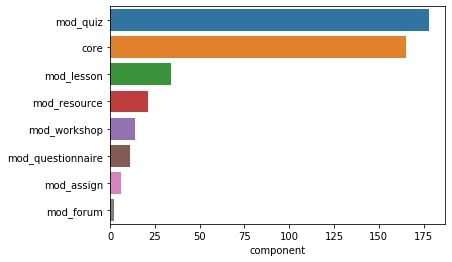

In [14]:
sns.barplot(y = data.index, x = 'component', data = data)

In [26]:
test = Statistic(dt)

/opt/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [148]:
lista = [1,2,3,4,5]
lista.pop(0)
lista.append(6)
lista

[2, 3, 4, 5, 6]

1

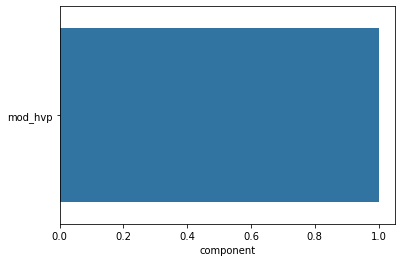

In [27]:
test.acao_aluno(60360, 'viewed')

In [150]:
for t in np.arange(0,60,0.03):
    print(t)

0.0
0.03
0.06
0.09
0.12
0.15
0.18
0.21
0.24
0.27
0.3
0.32999999999999996
0.36
0.39
0.42
0.44999999999999996
0.48
0.51
0.54
0.57
0.6
0.63
0.6599999999999999
0.69
0.72
0.75
0.78
0.8099999999999999
0.84
0.87
0.8999999999999999
0.9299999999999999
0.96
0.99
1.02
1.05
1.08
1.1099999999999999
1.14
1.17
1.2
1.23
1.26
1.29
1.3199999999999998
1.3499999999999999
1.38
1.41
1.44
1.47
1.5
1.53
1.56
1.5899999999999999
1.6199999999999999
1.65
1.68
1.71
1.74
1.77
1.7999999999999998
1.8299999999999998
1.8599999999999999
1.89
1.92
1.95
1.98
2.01
2.04
2.07
2.1
2.13
2.16
2.19
2.2199999999999998
2.25
2.28
2.31
2.34
2.37
2.4
2.4299999999999997
2.46
2.4899999999999998
2.52
2.55
2.58
2.61
2.6399999999999997
2.67
2.6999999999999997
2.73
2.76
2.79
2.82
2.85
2.88
2.9099999999999997
2.94
2.9699999999999998
3.0
3.03
3.06
3.09
3.12
3.15
3.1799999999999997
3.21
3.2399999999999998
3.27
3.3
3.33
3.36
3.3899999999999997
3.42
3.4499999999999997
3.48
3.51
3.54
3.57
3.5999999999999996
3.63
3.6599999999999997
3.69
3.7199999